# Proyek Creating Model Recommendation System :

- **Nama:** Akbar Widianto
- **Email:** wdntoakbar@gmail.com
- **ID Dicoding:** wakbarr

# Data Understanding

## Memuat Dataset dari File Lokal

### memuat dataset dari file lokal menggunakan library pandas.

In [19]:
import pandas as pd
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

# Memuat dataset dari file lokal
data_film = pd.read_csv('film_indo.csv')

# Menampilkan 5 baris pertama untuk memeriksa data
print(data_film.head())

   movie_id                     title  year  \
0    100001       #FriendButMarried 2  2020   
1    100002                  4 Mantan  2020   
2    100003  Aku Tahu Kapan Kamu Mati  2020   
3    100004               Anak Garuda  2020   
4    100005                 Dignitate  2020   

                                         description      genre rating  \
0  Ayudia (Mawar De Jongh) is not satisfied enoug...  Biography    13+   
1  Sara, Airin, Rachel, and Amara were accidental...   Thriller    17+   
2  After apparent death, Siena is able to see sig...     Horror    13+   
3  Good Morning Indonesia, a school for poor orph...  Adventure    13+   
4  Alfi (Al Ghazali) meets Alana (Caitlin Halderm...      Drama    17+   

   users_rating votes   languages          directors  \
0           6.5   120  Indonesian      Rako Prijanto   
1           6.4     8  Indonesian      Hanny Saputra   
2           5.4    17  Indonesian  Hadrah Daeng Ratu   
3           9.1    27  Indonesian       Faozan R

## Menambahkan Kolom user_id

### Untuk mendukung proses Collaborative Filtering, saya tambahkan kolom user_id sebagai identifikasi unik untuk setiap entri.

In [20]:
# Menambahkan kolom user_id secara unik
data_film['user_id'] = ['U' + str(i).zfill(3) for i in range(1, len(data_film) + 1)]

# Menampilkan dataset dengan kolom baru
print(data_film)

      movie_id                     title  year  \
0       100001       #FriendButMarried 2  2020   
1       100002                  4 Mantan  2020   
2       100003  Aku Tahu Kapan Kamu Mati  2020   
3       100004               Anak Garuda  2020   
4       100005                 Dignitate  2020   
...        ...                       ...   ...   
1267    101268     The Tiger from Tjampa  1953   
1268    101269       Enam Djam di Djogja  1951   
1269    101270             Darah dan Doa  1950   
1270    101271         Resia Boroboedoer  1928   
1271    101272        Loetoeng Kasaroeng  1926   

                                            description      genre rating  \
0     Ayudia (Mawar De Jongh) is not satisfied enoug...  Biography    13+   
1     Sara, Airin, Rachel, and Amara were accidental...   Thriller    17+   
2     After apparent death, Siena is able to see sig...     Horror    13+   
3     Good Morning Indonesia, a school for poor orph...  Adventure    13+   
4     Alfi (Al

## Deskripsi Variabel dalam Dataset

### Berikut adalah penjelasan mengenai kolom-kolom dalam dataset:

- `movie_id`: ID unik film sesuai dengan yang ada di IMDb.
- `title`: Judul film.
- `year`: Tahun rilis film.
- `description`: Sinopsis singkat mengenai film.
- `genre`: Genre film.
- `rating`: Rating usia film.
- `users_rating`: Rata-rata rating dari pengguna yang memberikan ulasan.
- `votes`: Jumlah pengguna yang memberikan rating terhadap film.
- `languages`: Bahasa yang digunakan dalam film.
- `directors`: Nama sutradara film.
- `actors`: Daftar pemeran utama dalam film.
- `runtime`: Durasi film dalam menit.
- `user_id`: ID unik pengguna.

## Analisis Awal Dataset

### memeriksa informasi dasar dataset, seperti jumlah data dan tipe data.

In [21]:
# Menampilkan informasi dataset
data_film.info()

# Menghitung jumlah film unik dan genre
print(f"Jumlah film unik: {len(data_film['movie_id'].unique())}")
print(f"Jumlah genre unik: {len(data_film['genre'].unique())}")
print(f"Daftar genre: {data_film['genre'].unique()}")
print(f"Jumlah rating unik: {len(data_film['users_rating'].unique())}")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1272 entries, 0 to 1271
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   movie_id      1272 non-null   int64  
 1   title         1272 non-null   object 
 2   year          1272 non-null   int64  
 3   description   840 non-null    object 
 4   genre         1236 non-null   object 
 5   rating        376 non-null    object 
 6   users_rating  1272 non-null   float64
 7   votes         1272 non-null   object 
 8   languages     1272 non-null   object 
 9   directors     1265 non-null   object 
 10  actors        1272 non-null   object 
 11  runtime       869 non-null    object 
 12  user_id       1272 non-null   object 
dtypes: float64(1), int64(2), object(10)
memory usage: 129.3+ KB
Jumlah film unik: 1272
Jumlah genre unik: 16
Daftar genre: ['Biography' 'Thriller' 'Horror' 'Adventure' 'Drama' 'Comedy' 'Animation'
 'Action' 'History' 'Crime' 'Romance' 'Sci-Fi' 'Fa

### Hasil yang diharapkan:

Total film: 1.272 entri unik.
Total genre: 16 jenis genre (contoh: Drama, Comedy, Horror, dll.).

## Statistik Deskriptif

### Untuk memahami distribusi rating, menggunakan fungsi describe().

In [22]:
# Menampilkan statistik deskriptif
data_film.describe()

,movie_id,year,users_rating
count,1272.00000,1272.000000,1272.000000
mean,100636.50000,2007.023585,6.144418
std,367.33908,12.968560,1.389315
min,100001.00000,1926.000000,1.200000
25%,100318.75000,2006.000000,5.300000
50%,100636.50000,2011.000000,6.400000
75%,100954.25000,2016.000000,7.100000
max,101272.00000,2020.000000,9.400000


### Temuan:

Rating pengguna berkisar antara 1.2 hingga 9.4, yang menunjukkan variasi penilaian yang cukup luas.

# Data Preparation

## Menangani Missing Value

### periksa apakah ada data yang hilang dalam dataset.

In [23]:
# Memeriksa missing value
data_film.isnull().sum()

,0
movie_id,0
title,0
year,0
description,432
genre,36
rating,896
users_rating,0
votes,0
languages,0
directors,7


### Jika terdapat missing value (misalnya pada kolom description, genre, atau runtime), kita akan menghapus baris yang bermasalah karena tidak memungkinkan untuk mengisi data secara akurat tanpa informasi tambahan.

In [24]:
# Menghapus baris dengan missing value
movies_clean = data_film.dropna()

# Memastikan data sudah bersih
movies_clean.isnull().sum()

,0
movie_id,0
title,0
year,0
description,0
genre,0
rating,0
users_rating,0
votes,0
languages,0
directors,0


## Menstandardisasi Genre

### pastikan setiap film hanya memiliki satu genre utama untuk mempermudah Content-Based Filtering.

In [25]:
# Mengurutkan berdasarkan movie_id
data_sorted = movies_clean.sort_values('movie_id', ascending=True)

# Memeriksa daftar genre unik
data_sorted['genre'].unique()

# Contoh: Memeriksa film dengan genre 'Thriller'
data_sorted[data_sorted['genre'] == 'Thriller']

,movie_id,title,year,description,genre,rating,users_rating,votes,languages,directors,actors,runtime,user_id
1,100002,4 Mantan,2020,"Sara, Airin, Rachel, and Amara were accidental...",Thriller,17+,6.4,8,Indonesian,Hanny Saputra,"['Ranty Maria', 'Jeff Smith', 'Melanie Berentz...",80 min,U002


## Menyiapkan Data untuk Pemodelan

### uat dataset baru yang hanya berisi kolom penting dan hapus duplikat.

In [26]:
# Menghapus duplikat berdasarkan movie_id
data_prepared = data_sorted.drop_duplicates('movie_id')

# Mengonversi kolom ke dalam bentuk list
id_film = data_prepared['movie_id'].tolist()
nama_film = data_prepared['title'].tolist()
genre_film = data_prepared['genre'].tolist()

# Membuat DataFrame baru
data_final = pd.DataFrame({
    'id': id_film,
    'nama_film': nama_film,
    'genre': genre_film
})

# Menampilkan data
data_final.head()

,id,nama_film,genre
0,100001,#FriendButMarried 2,Biography
1,100002,4 Mantan,Thriller
2,100003,Aku Tahu Kapan Kamu Mati,Horror
3,100004,Anak Garuda,Adventure
4,100005,Dignitate,Drama


### Data kini siap untuk digunakan dalam proses pemodelan.

# Pengembangan Model dengan Content-Based Filtering

## Representasi Fitur dengan TF-IDF

### gunakan TfidfVectorizer untuk mengubah data genre menjadi representasi numerik.

In [27]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Inisialisasi TF-IDF
tfidf = TfidfVectorizer()

# Melatih TF-IDF pada kolom genre
tfidf.fit(data_final['genre'])

# Transformasi data ke matriks TF-IDF
tfidf_matriks = tfidf.fit_transform(data_final['genre'])

# Melihat dimensi matriks
print(f"Dimensi matriks TF-IDF: {tfidf_matriks.shape}")

Dimensi matriks TF-IDF: (286, 11)


### Penjelasan:

Dimensi matriks menunjukkan jumlah film (baris) dan jumlah genre unik (kolom).

## Menghitung Kesamaan dengan Cosine Similarity

### hitung kesamaan antar-film berdasarkan matriks TF-IDF.

In [28]:
from sklearn.metrics.pairwise import cosine_similarity

# Menghitung cosine similarity
kesamaan = cosine_similarity(tfidf_matriks)

# Membuat DataFrame kesamaan
df_kesamaan = pd.DataFrame(kesamaan, index=data_final['nama_film'], columns=data_final['nama_film'])

# Menampilkan sampel
df_kesamaan.sample(5, axis=1).sample(5, axis=0)

nama_film,Bike Boyz,Bebas,Dear Nathan,Sesuai Aplikasi,Marlina the Murderer in Four Acts
nama_film,,,,,
Rage and Honor II,0.0,0.0,0.0,0.0,0.0
Gila Lu Ndro,1.0,1.0,0.0,1.0,0.0
Filosofi Kopi 2: Ben & Jody,0.0,0.0,0.0,0.0,0.0
Revan & Reina,0.0,0.0,1.0,0.0,1.0
Meet Me After Sunset,0.0,0.0,1.0,0.0,1.0


### Penjelasan:

Nilai 1.0 menunjukkan dua film memiliki genre yang sama.
Nilai mendekati 0 menunjukkan perbedaan genre.

## Fungsi Rekomendasi Film

### buat fungsi untuk memberikan rekomendasi berdasarkan nama film.

In [29]:
def rekomendasi_film(nama_film, data_kesamaan=df_kesamaan, data_film=data_final[['nama_film', 'genre']], jumlah=5):
    # Mengambil indeks film dengan kesamaan tertinggi
    indeks = data_kesamaan.loc[:, nama_film].to_numpy().argpartition(range(-1, -jumlah, -1))
    film_terdekat = data_kesamaan.columns[indeks[-1:-(jumlah+2):-1]]

    # Menghapus film yang dicari dari hasil rekomendasi
    film_terdekat = film_terdekat.drop(nama_film, errors='ignore')

    # Mengembalikan hasil rekomendasi
    return pd.DataFrame(film_terdekat).merge(data_film).head(jumlah)

# Contoh penggunaan
rekomendasi_film('MeloDylan')

,nama_film,genre
0,Hanum & Rangga: Faith & The City,Drama
1,Dear Nathan,Drama
2,Labuan Hati,Drama
3,Mata Batin,Drama
4,Love for Sale 2,Drama


### Hasil:

Fungsi ini akan mengembalikan 5 film dengan genre serupa (misalnya, Drama) berdasarkan film yang dipilih.

# Pengembangan Model dengan Collaborative Filtering

## Persiapan Data

### siapkan data dengan hanya menyisakan kolom yang relevan.

In [30]:
# Memilih kolom yang diperlukan
data_cf = data_film[['movie_id', 'user_id', 'users_rating']].drop_duplicates()

# Encoding user_id dan movie_id
user_unik = data_cf['user_id'].unique().tolist()
user_ke_indeks = {val: idx for idx, val in enumerate(user_unik)}
movie_unik = data_cf['movie_id'].unique().tolist()
movie_ke_indeks = {val: idx for idx, val in enumerate(movie_unik)}

# Mapping ke DataFrame
data_cf['user'] = data_cf['user_id'].map(user_ke_indeks)
data_cf['movie'] = data_cf['movie_id'].map(movie_ke_indeks)

# Informasi jumlah user dan film
jumlah_user = len(user_ke_indeks)
jumlah_film = len(movie_ke_indeks)
print(f"Jumlah user: {jumlah_user}, Jumlah film: {jumlah_film}")

# Normalisasi rating ke skala 0-1
data_cf['users_rating'] = data_cf['users_rating'].astype(float)
min_rating = data_cf['users_rating'].min()
max_rating = data_cf['users_rating'].max()

Jumlah user: 1272, Jumlah film: 1272


## Membagi Data untuk Pelatihan dan Validasi

### bagi data menjadi 80% untuk pelatihan dan 20% untuk validasi.

In [31]:
# Mengacak data
data_cf = data_cf.sample(frac=1, random_state=42)

# Membuat input (x) dan target (y)
x = data_cf[['user', 'movie']].values
y = data_cf['users_rating'].apply(lambda r: (r - min_rating) / (max_rating - min_rating)).values

# Membagi data
indeks_pelatihan = int(0.8 * len(data_cf))
x_train, x_val = x[:indeks_pelatihan], x[indeks_pelatihan:]
y_train, y_val = y[:indeks_pelatihan], y[indeks_pelatihan:]

## Membangun Model

### gunakan TensorFlow untuk membuat model Collaborative Filtering.

In [32]:
import tensorflow as tf
from tensorflow.keras import layers

class ModelRekomendasi(tf.keras.Model):
    def __init__(self, num_users, num_movies, embedding_dim):
        super().__init__()
        self.user_emb = layers.Embedding(num_users, embedding_dim, embeddings_initializer='he_normal', embeddings_regularizer=tf.keras.regularizers.l2(1e-6))
        self.user_bias = layers.Embedding(num_users, 1)
        self.movie_emb = layers.Embedding(num_movies, embedding_dim, embeddings_initializer='he_normal', embeddings_regularizer=tf.keras.regularizers.l2(1e-6))
        self.movie_bias = layers.Embedding(num_movies, 1)

    def call(self, inputs):
        user_vec = self.user_emb(inputs[:, 0])
        user_b = self.user_bias(inputs[:, 0])
        movie_vec = self.movie_emb(inputs[:, 1])
        movie_b = self.movie_bias(inputs[:, 1])
        dot = tf.tensordot(user_vec, movie_vec, 2)
        output = dot + user_b + movie_b
        return tf.nn.sigmoid(output)

# Inisialisasi dan kompilasi model
model = ModelRekomendasi(jumlah_user, jumlah_film, 50)
model.compile(
    loss=tf.keras.losses.BinaryCrossentropy(),
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    metrics=[tf.keras.metrics.RootMeanSquaredError()]
)

# Melatih model
history = model.fit(
    x=x_train, y=y_train,
    batch_size=8, epochs=100,
    validation_data=(x_val, y_val)
)

Epoch 1/100
128/128 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 0.6934 - root_mean_squared_error: 0.2012 - val_loss: 0.6927 - val_root_mean_squared_error: 0.1942
Epoch 2/100
128/128 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.6762 - root_mean_squared_error: 0.1800 - val_loss: 0.6929 - val_root_mean_squared_error: 0.1944
Epoch 3/100
128/128 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.6674 - root_mean_squared_error: 0.1624 - val_loss: 0.6930 - val_root_mean_squared_error: 0.1944
Epoch 4/100
128/128 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.6676 - root_mean_squared_error: 0.1618 - val_loss: 0.6930 - val_root_mean_squared_error: 0.1945
Epoch 5/100
128/128 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.6594 - root_mean_squared_error: 0.1547 - val_loss: 0.6930 - val_root_mean_squared_error: 0.1945
Epoch 6/100
128/128 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.6603 - root_mean_squared_error: 0.1509 - val_loss: 0.6930 - val_root_mean_squared_error: 0.1945
Epoch 7/100
128/128 ━━━━━━━━━━━━━━━━━━━━ 1s 4m

## Visualisasi Hasil Pelatihan

### visualisasikan metrik RMSE untuk mengevaluasi performa model.

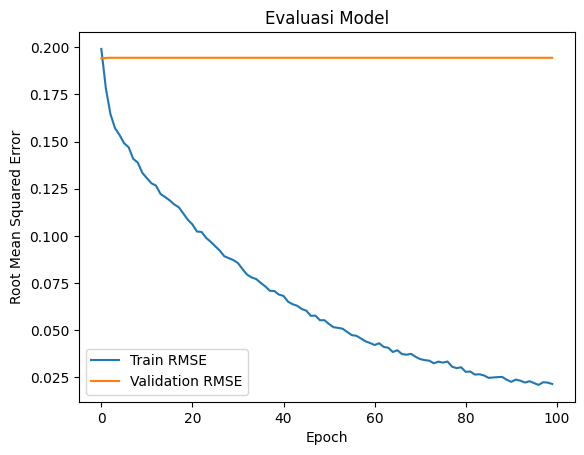

In [33]:
import matplotlib.pyplot as plt

plt.plot(history.history['root_mean_squared_error'], label='Train RMSE')
plt.plot(history.history['val_root_mean_squared_error'], label='Validation RMSE')
plt.title('Evaluasi Model')
plt.xlabel('Epoch')
plt.ylabel('Root Mean Squared Error')
plt.legend()
plt.show()

## Menghasilkan Rekomendasi

### buat rekomendasi untuk pengguna tertentu.

### Debugging Data Awal

In [38]:
# Cetak beberapa informasi untuk debugging
print(f"Jumlah movie_id unik di data_cf: {len(data_cf['movie_id'].unique())}")
print(f"Jumlah id unik di data_final: {len(data_final['id'].unique())}")
print(f"Contoh film_rekomendasi: {film_rekomendasi[:5]}")
print(f"Contoh id di data_final: {data_final['id'].head().tolist()}")

Jumlah movie_id unik di data_cf: 1272
Jumlah id unik di data_final: 286
Contoh film_rekomendasi: [100085, 100041, 100064, 100214, 100220]
Contoh id di data_final: [100001, 100002, 100003, 100004, 100005]


### Memastikan Konsistensi Data

In [39]:
# Filter film_rekomendasi agar hanya menyertakan id yang ada di data_final
film_rekomendasi = [film_id for film_id in film_rekomendasi if film_id in data_final['id'].values]

### Menangani Kasus Kosong dengan Pengecekan

In [41]:
print("\n10 Rekomendasi Film:")
for film_id in film_rekomendasi:
    detail = data_final[data_final['id'] == film_id]
    if not detail.empty:
        print(f"{detail['nama_film'].iloc[0]} (Genre: {detail['genre'].iloc[0]})")
    else:
        print(f"Film dengan ID {film_id} tidak ditemukan di data_final")


10 Rekomendasi Film:
Mendadak Kaya (Genre: Comedy)
Dilan 1991 (Genre: Drama)
Koboy Kampus (Genre: Comedy)
Suzzanna: Bernapas dalam Kubur (Genre: Comedy)
The Returning (Genre: Horror)
Dimsum Martabak (Genre: Comedy)
Dignitate (Genre: Drama)
Ratu Ilmu Hitam (Genre: Horror)


In [42]:
# Memilih pengguna acak
user_id = data_cf['user_id'].sample(1).iloc[0]
film_dilihat = data_cf[data_cf['user_id'] == user_id]

# Film yang belum dilihat
film_belum_dilihat = data_final[~data_final['id'].isin(film_dilihat['movie_id'])]['id']
film_belum_dilihat = list(set(film_belum_dilihat).intersection(movie_ke_indeks.keys()))
film_belum_dilihat = [[movie_ke_indeks.get(film)] for film in film_belum_dilihat]

# Menyiapkan input untuk prediksi
user_indeks = user_ke_indeks.get(user_id)
input_prediksi = np.hstack(([[user_indeks]] * len(film_belum_dilihat), film_belum_dilihat))

# Memprediksi rating
prediksi = model.predict(input_prediksi).flatten()
indeks_top = prediksi.argsort()[-10:][::-1]
film_rekomendasi = [movie_unik[i] for i in indeks_top]

# Filter film_rekomendasi agar hanya yang ada di data_final
film_rekomendasi = [film_id for film_id in film_rekomendasi if film_id in data_final['id'].values]

# Menampilkan hasil
print(f"Rekomendasi untuk pengguna {user_id}:")
print("Film yang disukai pengguna:")
for film in film_dilihat.sort_values(by='users_rating', ascending=False).head(5).itertuples():
    detail = data_final[data_final['id'] == film.movie_id]
    if not detail.empty:
        print(f"{detail['nama_film'].iloc[0]} (Genre: {detail['genre'].iloc[0]})")
    else:
        print(f"Film dengan ID {film.movie_id} tidak ditemukan")

print("\n10 Rekomendasi Film:")
for film_id in film_rekomendasi:
    detail = data_final[data_final['id'] == film_id]
    if not detail.empty:
        print(f"{detail['nama_film'].iloc[0]} (Genre: {detail['genre'].iloc[0]})")
    else:
        print(f"Film dengan ID {film_id} tidak ditemukan di data_final")

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
Rekomendasi untuk pengguna U950:
Film yang disukai pengguna:
Film dengan ID 100950 tidak ditemukan

10 Rekomendasi Film:
Mendadak Kaya (Genre: Comedy)
Dilan 1991 (Genre: Drama)
Koboy Kampus (Genre: Comedy)
Dignitate (Genre: Drama)
Target (Genre: Comedy)
Surat Cinta Untuk Starla the Movie (Genre: Drama)
Ratu Ilmu Hitam (Genre: Horror)
Wiro Sableng 212 (Genre: Action)
